# Seaborn Tutorial

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [9]:
print(sns.get_dataset_names()) 

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [10]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution plot

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_8875/3234414368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crash_df['not_distracted'], kde=False, bins=25)


<Axes: xlabel='not_distracted'>

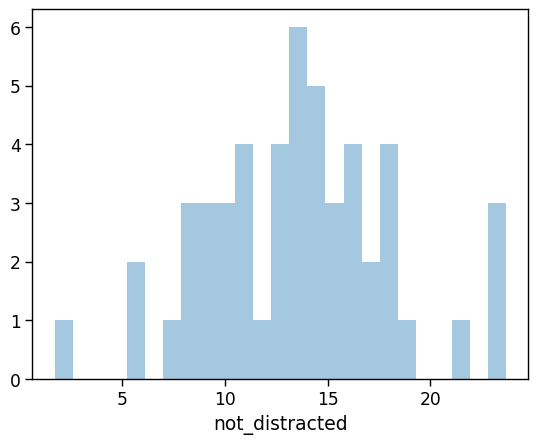

In [12]:
sns.distplot(crash_df['not_distracted'], kde=False, bins=25)

### Joint plot

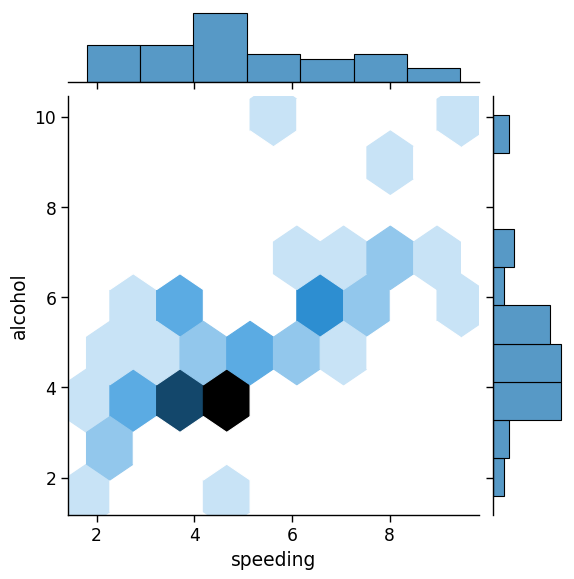

In [14]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

### KDE plot

<Axes: xlabel='alcohol', ylabel='Density'>

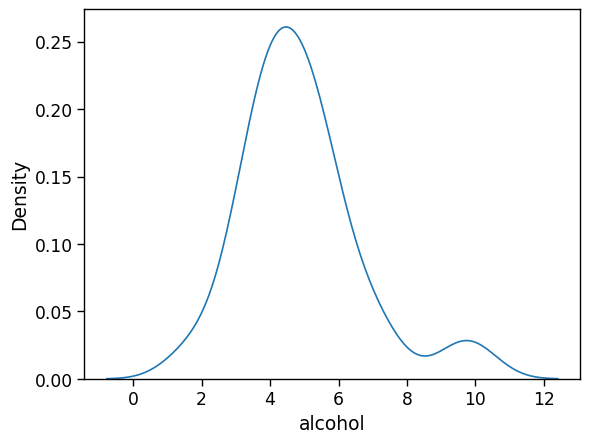

In [16]:
sns.kdeplot(crash_df['alcohol'])

### Pair plots

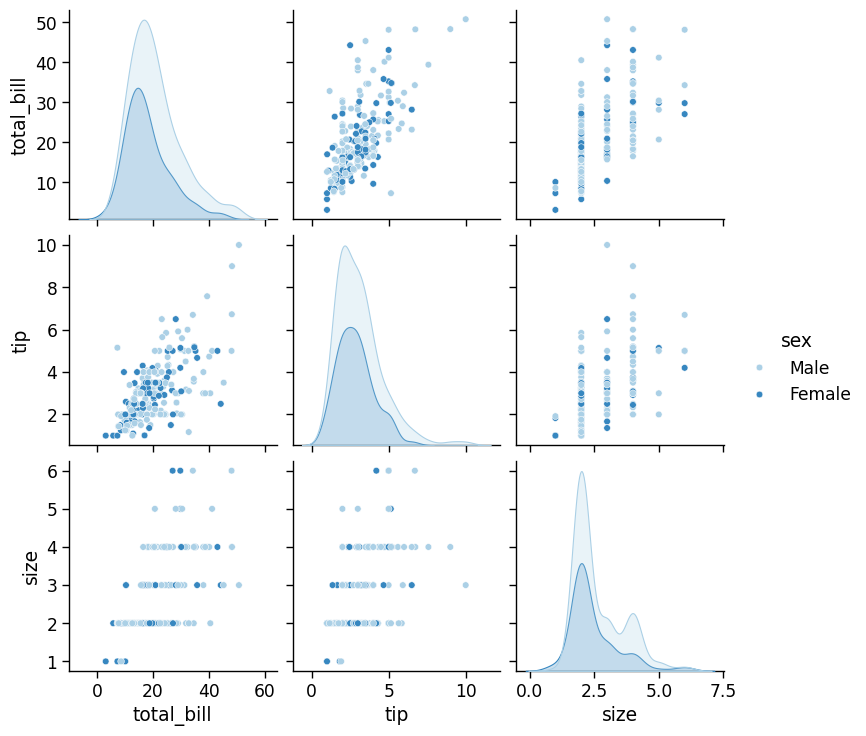

In [18]:
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='Blues')


### Rug plot

<Axes: xlabel='tip'>

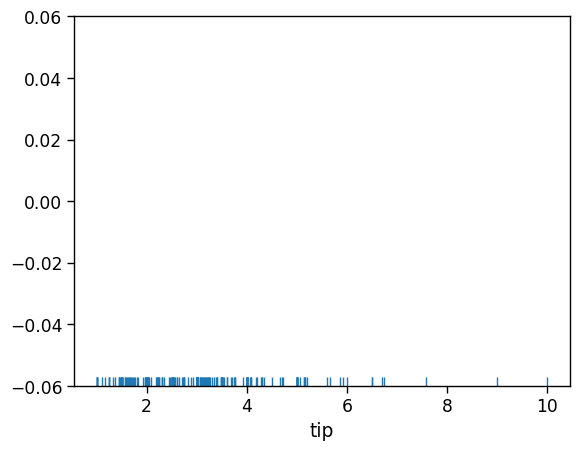

In [20]:
sns.rugplot(tips_df['tip'])

### Styling

<Figure size 800x400 with 0 Axes>

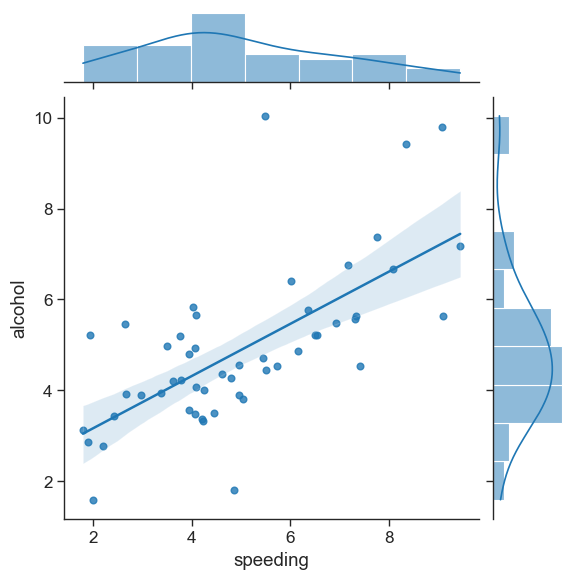

In [22]:
sns.set_style('ticks')

plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.4)

sns.jointplot(x = 'speeding', y='alcohol', data=crash_df, kind='reg')

#sns.despine(left=True, bottom=True)


## Categorical plots

# Bar plots

<Axes: xlabel='sex', ylabel='total_bill'>

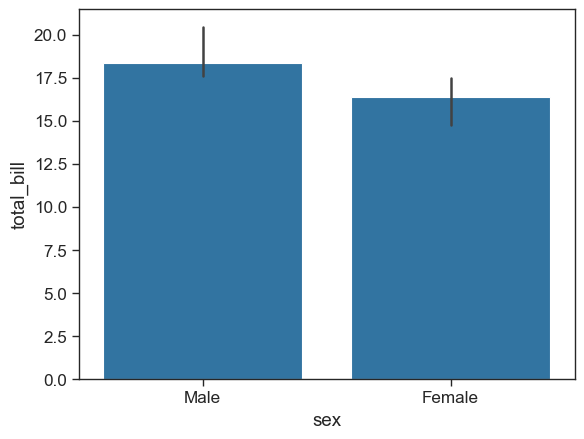

In [25]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count plot

<Axes: xlabel='sex', ylabel='count'>

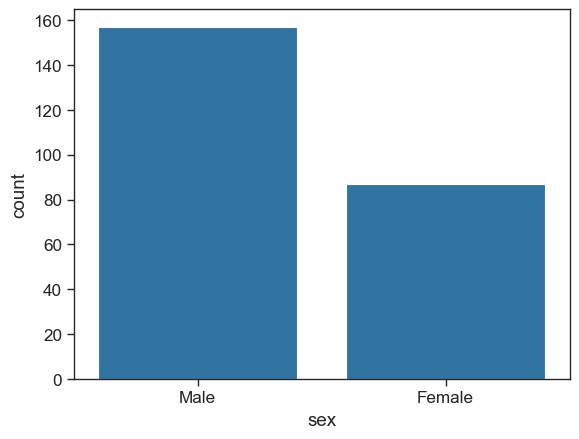

In [27]:
sns.countplot(x='sex', data=tips_df)

### Box plot

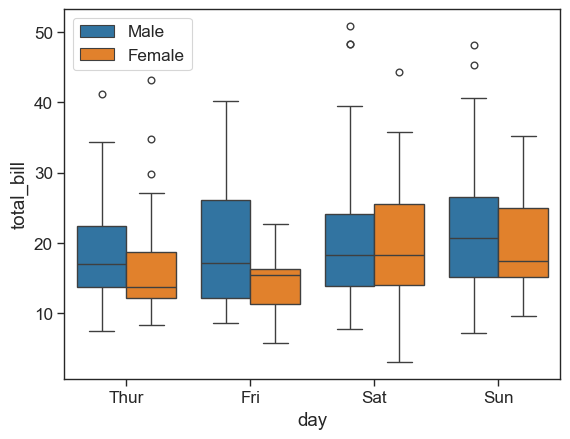

In [29]:
sns.boxplot(x='day', y='total_bill', data=tips_df,  hue='sex')

plt.legend(loc=0)

### Violin plot

<Axes: xlabel='day', ylabel='total_bill'>

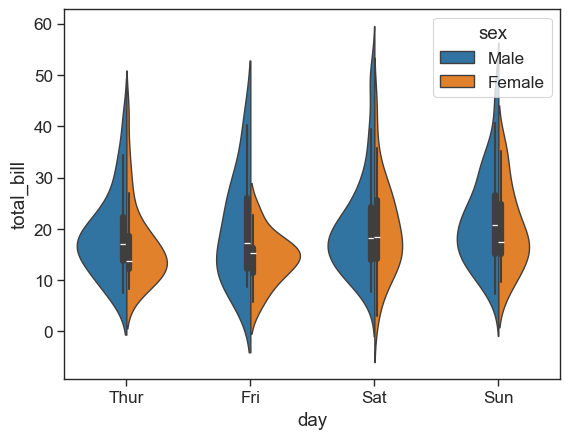

In [31]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip plot

<Axes: xlabel='day', ylabel='total_bill'>

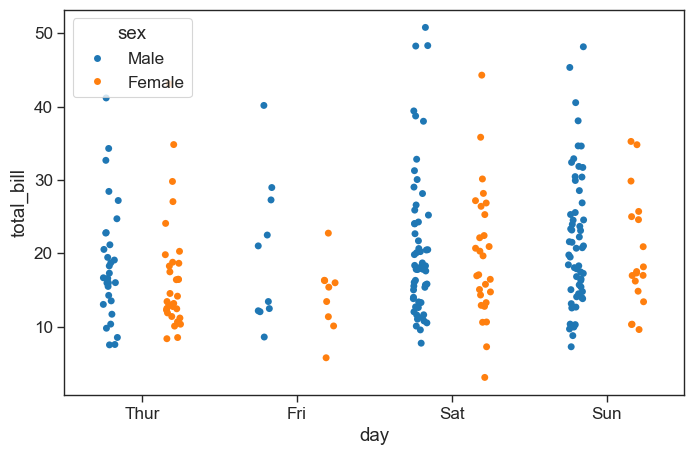

In [33]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data= tips_df, jitter=True, hue='sex', dodge=True)

### Swarm plot

<Axes: xlabel='day', ylabel='total_bill'>

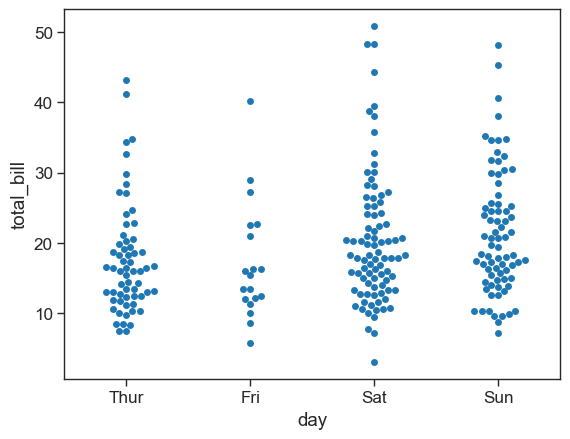

In [35]:
sns.swarmplot(x='day', y='total_bill', data= tips_df)

### Palettes

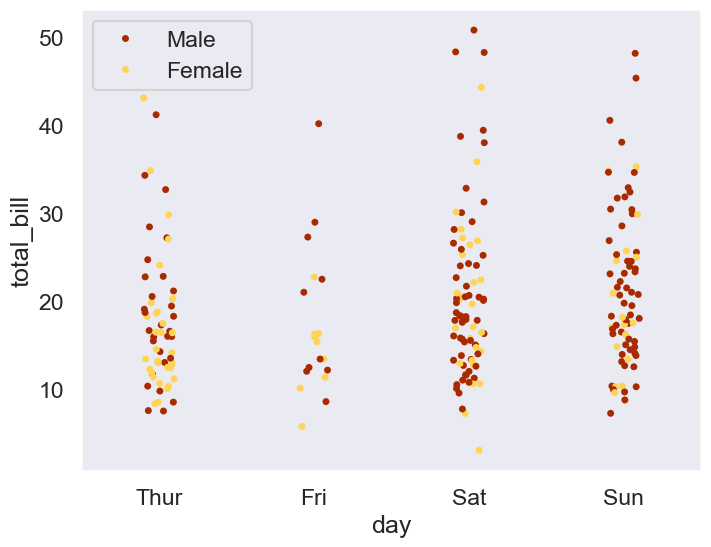

In [37]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data= tips_df, hue='sex', palette= 'afmhot')

plt.legend(loc=0)

### Matrix plots

#### Heatmaps

<Axes: >

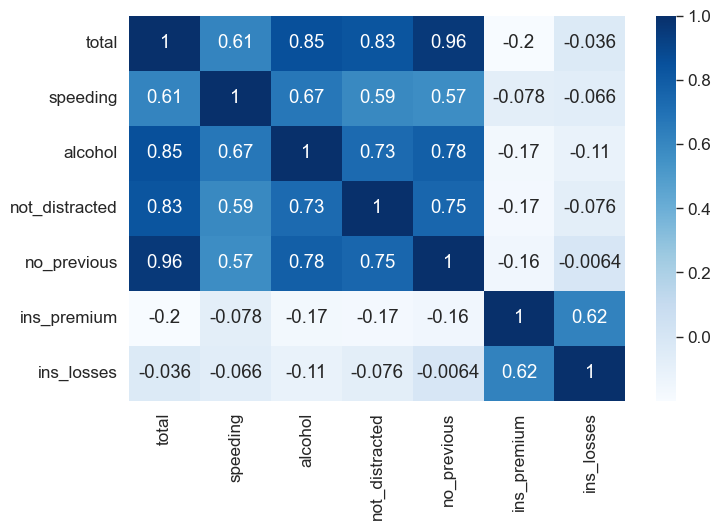

In [54]:
plt.figure(figsize=(8,5))
sns.set_context('paper', font_scale=1.4)

# Select only numeric columns for correlation
numeric_df = crash_df.select_dtypes(include=[float, int])

# Calculate correlation matrix
crash_mx = numeric_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')



#### Heatmap 2 using pivot table

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_8875/461775140.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights.pivot_table(index='month', columns='year', values='passengers')


<Axes: xlabel='year', ylabel='month'>

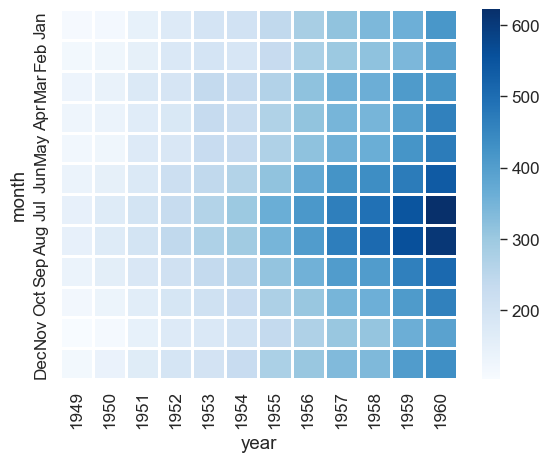

In [64]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

### Cluster Map

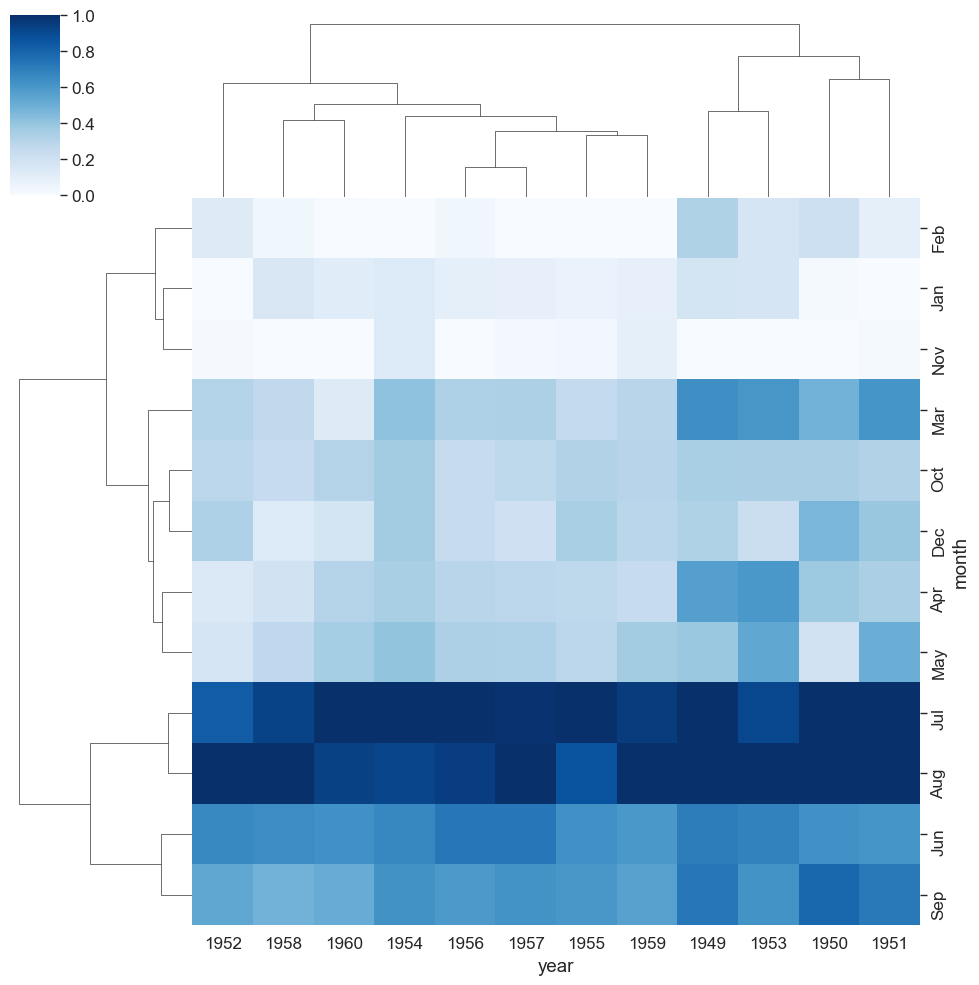

In [75]:
# iris = sns.load_dataset('iris')
# species = iris.pop('species')
# sns.clustermap(iris)

sns.clustermap(flights, cmap='Blues', standard_scale=1)

### Pair grid

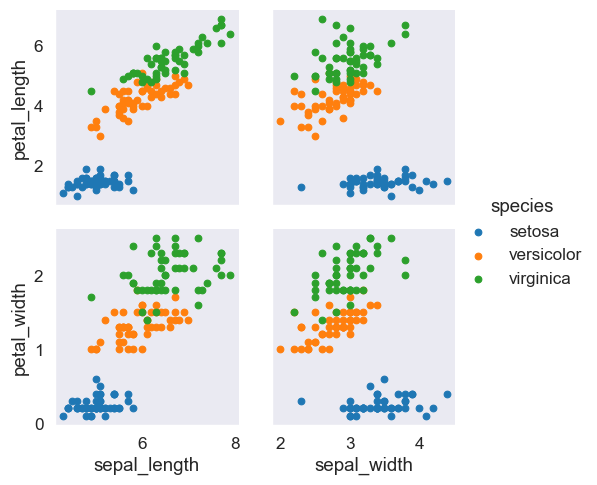

In [90]:
iris = sns.load_dataset('iris')
# iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map_diag(plt.hist)
# #iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

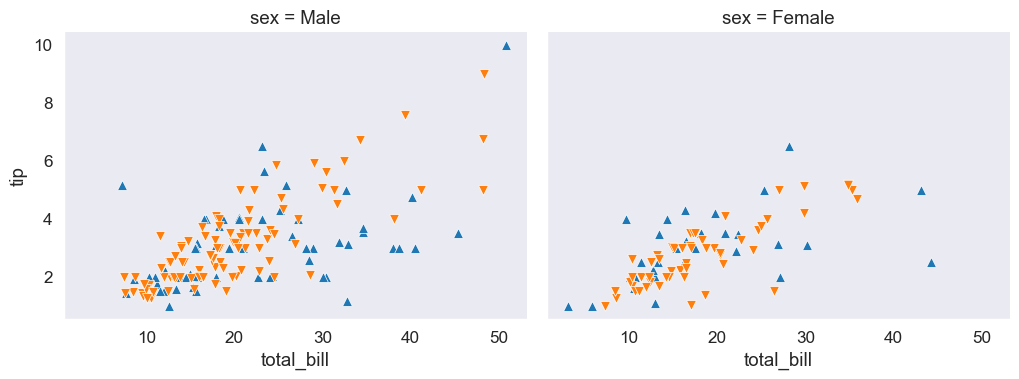

In [117]:
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                        col_order=['Dinner', 'Lunch'], palette='Set1')
# #tips_fg.map(plt.hist, 'total_bill', bins=8)
# #tips_fg.map(plt.scatter, 'total_bill', 'tip')
# tips_fg.map(plt.scatter, 'total_bill', 'tip')

kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes','No'],
                        hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)
            
                        


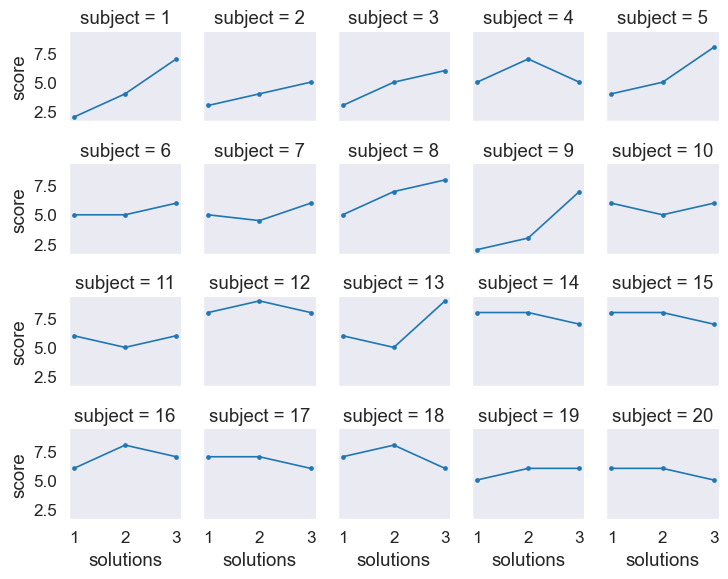

In [125]:
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression plots

In [132]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


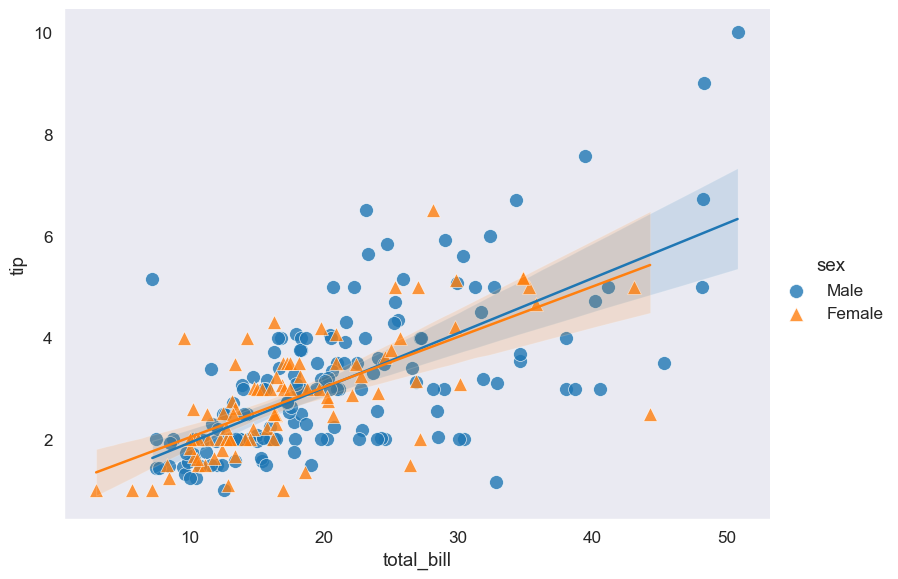

In [144]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'],
           scatter_kws={'s':100, 'linewidths':0.5, 'edgecolor':'w'},
           height=6, aspect=8/6)


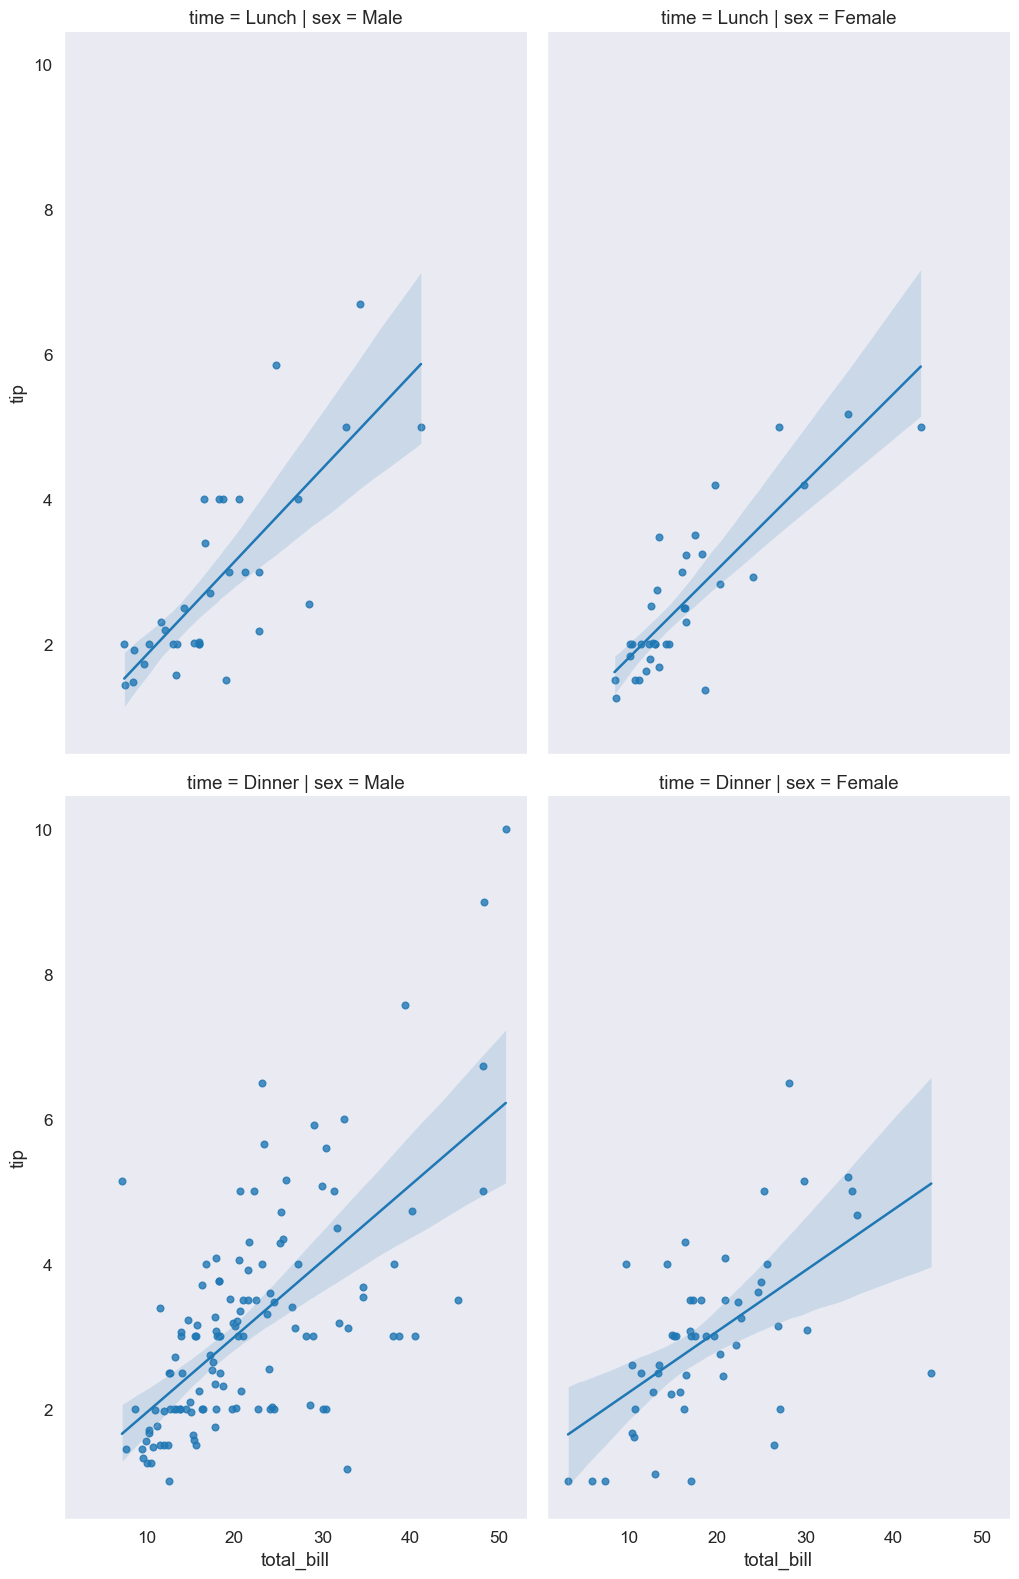

In [150]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df,
           height=8, aspect=0.65)